# Piyush Kumar Gaurav
# Roll No. 20104442
# Assignment - 2


## Importing Suggested Libraries

In [51]:
import numpy as np # used to develop algorithms assigned in Questions
import matplotlib.pyplot as plt # just for displaying data and fitted line
import time # just for computing time - as suggested in forum

# Q1 mentions the following gradient descent function

In [2]:
# Function as given in Question:
def gradient_descent(gradient, init, learn_rate, n_iter=50, tol=1e-06):
    x = init
    for _ in range(n_iter):
        delta = -learn_rate * gradient(x)
        if np.all(np.abs(delta) <= tol):
            break
        x+= delta
    return round(x*1000)/1000

# Other Customized functions built for Q1

In [3]:
def gradient1(x):
    ''' 
    This fn serves to find the gradient of "𝑥^2+3*𝑥+4" i.e. 2*x +3    
    input: x -> scalar float value - value of x at which gradient has to be found.
    output: der -> scalar float value - value of derievative of fn. "𝑥^2+3*𝑥+4"
    '''
    der = 2*x + 3
    return der

def gradient2(x):
    ''' 
    This fn serves to find the gradient of " 𝑥^4 − 3*(𝑥^2)+2𝑥" i.e. 4*(x^3) - 6*x + 2    
    input: x -> scalar float value - value of x at which gradient has to be found.
    output: der -> scalar float value - value of derievative of fn. "𝑥^2+3*𝑥+4"
    '''
    der = 4*(x**3) - 6*x + 2
    return der

def random_shuffle(X_data, Y_data):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. randomly shuffles X and Y data
    2. keeps a track of correspondence between X and Y.
    
    input: X_data -> 1D feature data np array of size "no of data points" 
           Y_data -> 1D target np array (here, price) of length "no of data points"
    output: X_data_shuffle -> randomly shuffled 1D feature data np array of size "no of data points" 
            Y_data_shuffle -> 1D target array (here, price) of length "no of data points" corresponding to "X_data_shuffle"
    '''
    no_data_points = X_data.shape[0]
    seq = []
    for l in range(no_data_points):
        seq.append(l)
        np.random.shuffle(seq)

    X_data_shuffle = []
    Y_data_shuffle = []

    for m in range(no_data_points):
        X_data_shuffle.append(X_data[seq[m]])
        Y_data_shuffle.append(Y_data[seq[m]])

    X_data_shuffle = np.array(X_data_shuffle)
    Y_data_shuffle = np.array(Y_data_shuffle)
    return X_data_shuffle, Y_data_shuffle

# Q1 a) Use the "gradient_descent" function to find minima of:
## (i) $ x^2 +3x + 4 $


In [4]:
# Initialize randomly
init = np.random.randint(-10,10)
# Define some constants
learn_rate = 0.01
n_iter = 1000
#Finding Minima using gradient descent algorithm
minima = gradient_descent(gradient1, init, learn_rate, n_iter)
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("                                            RESULTS                                          \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("Considering Random initialization and learning rate =", learn_rate, "\n")
print("The Minima for the given equation is", minima, "\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")


--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

                                            RESULTS                                          

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

Considering Random initialization and learning rate = 0.01 

The Minima for the given equation is -1.5 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



## (ii) $ x^4 -3x^2 + 2x $

# Soln) 

<font size="4">
    The function is a quartic hence multiple optima will be present. The procedure below will apply gradient descent to find minimum value of the function by initializing x multiple times. The gradient descent will converge to local minima. The global minima will be found by observing the least function value out of all minimums
    
</font>

In [5]:
# Define some constants
learn_rate = 0.001
n_iter = 1000
# Function is a quadratic hence multiple optima will be present.
# In order to find global minima different random initialization is considered.
# All the minimums will be displayed. The minimum out of all will be selected as global minima.
# Initializing list to later append 1) x corresponding to min value (x), 2) function min value (y)
min_list = []
fnval_list = []
# Loop to find minima using gradient descent with different initialization.
for i in range(10):
    init = np.random.randint(-10,10)
    minima = gradient_descent(gradient2, init, learn_rate, n_iter)
    fnval_list.append(minima**4 -3*minima**2 + 2*minima)
    min_list.append(minima)
mins = np.unique(np.array(min_list)) 
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("                                            RESULTS                                          \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")

print("Considering Random initialization and learning rate =", learn_rate, "\n")
print("There are multiple minima found for the given function: x_min1 =", mins[0], "and x_min2 =", mins[1],"\n")
print("The global minima for the given equation is", min_list[fnval_list.index(min(fnval_list))], "\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")


--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

                                            RESULTS                                          

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

Considering Random initialization and learning rate = 0.001 

There are multiple minima found for the given function: x_min1 = -1.366 and x_min2 = 1.0 

The global minima for the given equation is -1.366 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



# Q1 b) Write a gradient function to calculate gradients for a linear regression y = ax + b

In [6]:
def sgd_gradient_lin_reg(w,x,y,mode=0, alpha_huber=2.0):
    ''' 
    This fn. finds gradient w.r.t. "w" for linear regression problem for a single data point.
    The fn. works for multiple modes namely 
    1) Squared loss (mode = 0)
    2) Absolute loss (mode = 1)
    3) Huber loss (mode = 2)
    input: w -> numpy array of float with shape (2,): w[0] - bias coeff, w[1] - x coeff 
           x -> scalar float value - value of x at which gradient has to be found.
           y -> scalar float value - value of actual y at which gradient has to be found.
           mode -> int - can be either 0 or 1 or 2 only
           alpha_huber -> float - apply only in mode=2 - value at which linear and quadratic loss meet.
    output: grad_w -> numpy array of float with shape (2,): grad_w[0] - w[0] gradient, grad_w[1] - w[1] gradient 
    '''
    grad_w = np.zeros(2)
    if mode==0: # Squared loss gradient
        grad_w[1] = -2*(y-((w[1]*x)+w[0]))*x
        grad_w[0] = -2*(y-((w[1]*x)+w[0]))
    elif mode==1: # Absolute loss gradient
        diff = y-((w[1]*x)+w[0])
        if diff<0:
            grad_w[1] = x
            grad_w[0] = 1
        elif diff>0:
            grad_w[1] = -x
            grad_w[0] = -1
        else:
            subg = np.random.uniform(low=-1, high=1)
            grad_w[1] = -subg*x
            grad_w[0] = -subg
    elif mode==2: # Huber loss gradient
        diff = y-((w[1]*x)+w[0])
        if diff >= 0:
            if diff > alpha_huber:
                grad_w[1] = -x
                grad_w[0] = -1
            else:
                grad_w[1] = -2*(y-((w[1]*x)+w[0]))*x
                grad_w[0] = -2*(y-((w[1]*x)+w[0]))
        else:
            if diff < -alpha_huber:
                grad_w[1] = x
                grad_w[0] = 1
            else:
                grad_w[1] = -2*(y-((w[1]*x)+w[0]))*x
                grad_w[0] = -2*(y-((w[1]*x)+w[0]))
    else:
        print("Invalid Mode entered.\n")
        print("Try Mode=0, Squared loss gradient.\n")
        print("Try Mode=1, Absolute loss gradient.\n")
        print("Try Mode=2, Huber loss gradient.\n")
    return grad_w

def sgd_descent(sgd_gradient_lin_reg, x, y, init, learn_rate, tol=1e-06, mode=0, alpha_huber=2.0):
    ''' 
    This fn. uses gradient computed in "sgd_gradient_lin_reg" and apply stochastic gradient descent.
    It thus update weights after computing gradient for every data point.
    Hence the parameter n_iter is intentionally kept equal to 1
    input: sgd_gradient_lin_reg -> The fun. which computes gradient for linear regression problem
           w -> numpy array of float with shape (2,): w[0] - bias coeff, w[1] - x coeff 
           x -> scalar float value - value of x at which gradient has to be found.
           y -> scalar float value - value of actual y at which gradient has to be found.
           init -> numpy array of float with shape (2,): initial value of w init[0] - bias coeff, init[1] - x coeff
           learn_rate - scalar float value - learning rate for gradient descent algorithm
           tol -> scalar float value - tolerance limit value for gradient.
           mode -> int - can be either 0 (squared) or 1 (absolute) or 2 (huber) only
           alpha_huber -> float - apply only in mode=2 - value at which linear and quadratic loss meet.
    output: w_updated -> numpy array of float with shape (2,): w_updated[0] - updated w[0], w_updated[1] - updated w[1]
    '''
    n_iter=1
    w = init
    for _ in range(n_iter):
        delta = -learn_rate * sgd_gradient_lin_reg(w,x,y, mode, alpha_huber)
        if np.all(np.abs(delta) <= tol):
            break
        w+= delta
    w_updated = np.round(w*1000)/1000
    return w_updated

# Q1 c) Generate artificial data for this regression according to the given protocol and 

# Use gradient descent to find the optimal parameters relating X with y. 

## (If you do this correctly, you should get {a,b} ~ {0.3, 2})

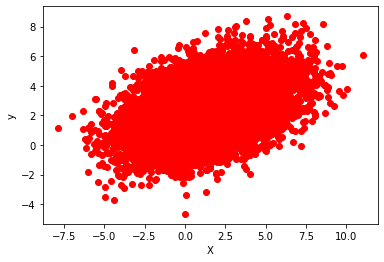

In [7]:
# Data generation as per mentioned protocol
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y = 2 + 0.3 * X + res

# Plotting Data
plt.scatter(X,y, c='red', alpha=1, marker='o')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [25]:
#Shuffling Data
Xs,ys = random_shuffle(X, y)
# Randomly initialising weights value
init = np.random.uniform(-2,2,2)
# Define some constants
learn_rate = 0.001
n_iter = 1
#bias = np.ones(10000)
#X_data = np.vstack((bias,Xs))

t_begin = time.time()
for i in range(Xs.shape[0]):
    xn = Xs[i]
    yn = ys[i]
    w_minima = sgd_descent(sgd_gradient_lin_reg, xn, yn, init, learn_rate, tol=1e-06, mode=0)
    init = w_minima
t_end = time.time()

# Prediction of y value using trained linear model
bias = np.ones(10000)
X_data = np.vstack((bias,Xs))
X_pred= X_data.T
w_minima = w_minima.reshape(w_minima.shape[0],1)
Y_pred = X_pred @ w_minima
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("                              RESULTS (with just 1 epoch and learn rate = ", learn_rate,"                  \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("The weights as per linear regression model are a =", w_minima[1,0], "and b =", w_minima[0,0],"\n")
print("Hence the equation of line for linear regression model is: y = ", w_minima[1,0],"(x)", "+", w_minima[0,0],"\n")
print("The time taken for executing SGD is: ", (t_end - t_begin), "\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")


--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

                              RESULTS (with just 1 epoch and learn rate =  0.001                   

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The weights as per linear regression model are a = 0.27 and b = 2.041 

Hence the equation of line for linear regression model is: y =  0.27 (x) + 2.041 

The time taken for executing SGD is:  0.23915553092956543 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



In [24]:
# Define some constants
learn_rate = 0.0001
n_epoch = 20
# Randomly initialising weights value
init = np.random.uniform(-2,2,2)

for j in range(n_epoch):
    #Shuffling Data
    Xs,ys = random_shuffle(X, y)

    for i in range(Xs.shape[0]):
        xn = Xs[i]
        yn = ys[i]
        w_minima = sgd_descent(sgd_gradient_lin_reg, xn, yn, init, learn_rate, tol=1e-06, mode=0)
        init = w_minima

# Prediction of y value using trained linear model
bias = np.ones(10000)
X_data = np.vstack((bias,Xs))
X_pred= X_data.T
w_minima = w_minima.reshape(w_minima.shape[0],1)
Y_pred = X_pred @ w_minima
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("                              RESULTS (with ",n_epoch, "epoch and learn rate = ", learn_rate,")                  \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("The weights as per linear regression model are a =", w_minima[1,0], "and b =", w_minima[0,0],"\n")
print("Hence the equation of line for linear regression model is: y = ", w_minima[1,0],"(x)", "+", w_minima[0,0],"\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")


--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

                              RESULTS (with  20 epoch and learn rate =  0.0001 )                  

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The weights as per linear regression model are a = 0.3 and b = 2.026 

Hence the equation of line for linear regression model is: y =  0.3 (x) + 2.026 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



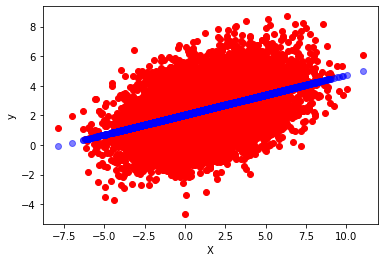

In [26]:
# Plotting and comparing  - "actual y data" and "the fitted linear regression fitted model output y"
plt.scatter(Xs,ys, c='red', alpha=1, marker='o')
plt.scatter(Xs,Y_pred, c='blue', alpha=0.5, marker='o')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Q1 d) Implement minibatch stochastic gradient descent using the code base you have developed so far.

In [29]:
def create_minibatch(X_train, Y_train, no_each_set):
    ''' 
    This function creates minibatches each of size "no_each_set"
    This fn. does following:
    1. splits dataset into "k" distinct sets where k = total_no_of_datapoints / no_each_set
    2. arrange all k sets in a specific format described below in "output"
    
    input: X_data -> np.array - 1D feature data np array of shape (no_of_data points,)
           Y_data -> np.array - 1D target value of shape (no_of_data_points,)
           no_each_set -> int - no. of datapoints in each minibatch
    output: X_mbatch -> np.array - k sets of 1D features. Shape of X_mbatch is (k, no_each_set)
            Y_mbatch -> np.array - k sets of 1D target value. Shape of Y_mbatch is (k, no_each_set)
    '''
    no_data_points = X_train.shape[0]
    k = int(np.floor(no_data_points/no_each_set))

    X_mbatch = []
    Y_mbatch = []
    temp_X = []
    temp_Y = []
    for i in range(k):
        for j in range(no_each_set):
            temp_X.append(X_train[(no_each_set*i)+j])
            temp_Y.append(Y_train[(no_each_set*i)+j])
        X_mbatch.append(np.array(temp_X))
        Y_mbatch.append(np.array(temp_Y))
        temp_X = []
        temp_Y = []
    X_mbatch = np.array(X_mbatch)
    Y_mbatch = np.array(Y_mbatch)
    return X_mbatch, Y_mbatch

def sgd_gradient_lin_reg(w,x,y,mode=0, alpha_huber=2.0):
    ''' 
    This fn. finds gradient w.r.t. "w" for linear regression problem for a single data point.
    The fn. works for multiple modes namely 
    1) Squared loss (mode = 0)
    2) Absolute loss (mode = 1)
    3) Huber loss (mode = 2)
    input: w -> numpy array of float with shape (2,): w[0] - bias coeff, w[1] - x coeff 
           x -> scalar float value - value of x at which gradient has to be found.
           y -> scalar float value - value of actual y at which gradient has to be found.
           mode -> int - can be either 0 or 1 or 2 only
           alpha_huber -> float - apply only in mode=2 - value at which linear and quadratic loss meet.
    output: grad_w -> numpy array of float with shape (2,): grad_w[0] - w[0] gradient, grad_w[1] - w[1] gradient 
    '''
    grad_w = np.zeros(2)
    if mode==0: # Squared loss gradient
        grad_w[1] = -2*(y-((w[1]*x)+w[0]))*x
        grad_w[0] = -2*(y-((w[1]*x)+w[0]))
    elif mode==1: # Absolute loss gradient
        diff = y-((w[1]*x)+w[0])
        if diff<0:
            grad_w[1] = x
            grad_w[0] = 1
        elif diff>0:
            grad_w[1] = -x
            grad_w[0] = -1
        else:
            subg = np.random.uniform(low=-1, high=1)
            grad_w[1] = -subg*x
            grad_w[0] = -subg
    elif mode==2: # Huber loss gradient
        diff = y-((w[1]*x)+w[0])
        if diff >= 0:
            if diff > alpha_huber:
                grad_w[1] = -x
                grad_w[0] = -1
            else:
                grad_w[1] = -2*(y-((w[1]*x)+w[0]))*x
                grad_w[0] = -2*(y-((w[1]*x)+w[0]))
        else:
            if diff < -alpha_huber:
                grad_w[1] = x
                grad_w[0] = 1
            else:
                grad_w[1] = -2*(y-((w[1]*x)+w[0]))*x
                grad_w[0] = -2*(y-((w[1]*x)+w[0]))
    else:
        print("Invalid Mode entered.\n")
        print("Try Mode=0, Squared loss gradient.\n")
        print("Try Mode=1, Absolute loss gradient.\n")
        print("Try Mode=2, Huber loss gradient.\n")
    return grad_w

def minibatch_gd_descent(sgd_gradient_lin_reg, X_mb, Y_mb, init, learn_rate, tol=1e-06, mode=0, alpha_huber=2.0):
    ''' 
    This fn. uses gradient computed in "sgd_gradient_lin_reg" and apply minibatch gradient descent.
    It thus update weights after computing gradient for every data point.
    Hence the parameter n_iter is intentionally kept equal size of minibatch
    input: sgd_gradient_lin_reg -> The fun. which computes gradient for linear regression problem
           w -> numpy array of float with shape (2,): w[0] - bias coeff, w[1] - x coeff 
           X_mb -> np.array - k sets of 1D features. Shape of X_mbatch is (k, no_each_set)
           Y_mb -> np.array - k sets of 1D target value. Shape of Y_mbatch is (k, no_each_set)
           init -> numpy array of float with shape (2,): initial value of w init[0] - bias coeff, init[1] - x coeff
           learn_rate - scalar float value - learning rate for gradient descent algorithm
           tol -> scalar float value - tolerance limit value for gradient.
           mode -> int - can be either 0 (squared) or 1 (absolute) or 2 (huber) only
           alpha_huber -> float - apply only in mode=2 - value at which linear and quadratic loss meet.
    output: w_updated -> numpy array of float with shape (2,): w_updated[0] - updated w[0], w_updated[1] - updated w[1]
    '''
    n_iter=X_mb.shape[0]
    w = init
    delta = np.zeros(2)
    for i in range(n_iter):
        x = X_mb[i]
        y = Y_mb[i]
        delta += -learn_rate * sgd_gradient_lin_reg(w,x,y, mode, alpha_huber)
        if np.all(np.abs(delta) <= tol):
            break
    w+= delta
    w_updated = np.round(w*1000)/1000
    return w_updated

In [32]:
# Data generation as per mentioned protocol
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y = 2 + 0.3 * X + res

#Shuffling Data
Xs,ys = random_shuffle(X, y)

# Create Minibatch
batch_size =32
X_mbatch, Y_mbatch = create_minibatch(Xs, ys, batch_size)

# Randomly initialising weights value
init = np.random.uniform(-2,2,2)

# Define some constants
learn_rate = 0.001

tmb_begin = time.time()
for i in range(X_mbatch.shape[0]):
    X_mb = X_mbatch[i,:]
    y_mb = Y_mbatch[i,:]
    w_minima = minibatch_gd_descent(sgd_gradient_lin_reg, X_mb, y_mb, init, learn_rate, tol=1e-06, mode=0)
    init = w_minima
tmb_end = time.time()

# Prediction of y value using trained linear model
bias = np.ones(10000)
X_data = np.vstack((bias,Xs))
X_pred= X_data.T
w_minima = w_minima.reshape(w_minima.shape[0],1)
Y_pred = X_pred @ w_minima
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("                 MiniBatch RESULTS (with ",1, "epoch and learn rate = ", learn_rate,"batch size =", batch_size,")       \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("The weights as per linear regression model are a =", w_minima[1,0], "and b =", w_minima[0,0],"\n")
print("Hence the equation of line for linear regression model is: y = ", w_minima[1,0],"(x)", "+", w_minima[0,0],"\n")
print("The time taken for executing minibatch GD is: ", (tmb_end - tmb_begin), "\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")


--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

                 MiniBatch RESULTS (with  1 epoch and learn rate =  0.001 batch size = 32 )       

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The weights as per linear regression model are a = 0.295 and b = 2.077 

Hence the equation of line for linear regression model is: y =  0.295 (x) + 2.077 

The time taken for executing minibatch GD is:  0.14306116104125977 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



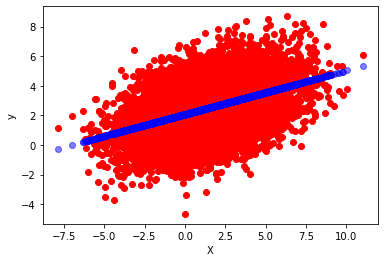

In [33]:
# Plotting and comparing  - "actual y data" and "the fitted linear regression fitted model output y"
plt.scatter(Xs,ys, c='red', alpha=1, marker='o')
plt.scatter(Xs,Y_pred, c='blue', alpha=0.5, marker='o')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Q1 e) Does SGD do better or worse in terms of time performance on our data? 

In [35]:
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("                                       RESULTS (SGD vs MiniBatch Comparison)                                         \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")

print("Minibatch SGD performs better (compared to SGD) in terms of time. Following is the comparison: \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("The time taken for executing SGD is: ", np.round((t_end - t_begin)*10000)/10000, "sec,", "\nwhile that of Minibatch GD (with batch size =", batch_size, ") is: ", np.round((tmb_end - tmb_begin)*10000)/10000, "sec","\n")
improve = ((((t_end-t_begin)-(tmb_end-tmb_begin))/(t_end-t_begin)) * 100 )
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("Hence, there is an improvement of ", np.round(improve*100)/100, "%" " with respect to time." )
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")


--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

                                       RESULTS (SGD vs MiniBatch Comparison)                                         

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

Minibatch SGD performs better (compared to SGD) in terms of time. Following is the comparison: 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The time taken for executing SGD is:  0.2392 sec, 
while that of Minibatch GD (with batch size = 32 ) is:  0.1431 sec 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

Henc

# Q1 e) ...contd.... Is there an optimal minibatch size that works best? Quantify and interpret your findings.

# Soln) 

<font size="4">
Generally we take batch_size as power of 2, so that it fits the memory requirement GPU or CPU hardware. So here as well, several batchsize is tested such that they are power of 2.<br>

**In Minibatch Gradient Descent approaches usually two kinds of protocols are followed:** <br>
    1. Gradients are summed in a minibatch (before weight update). <br>
    2. Gradients are averaged in a minibatch (before weight update). <br>
    
Summed up gradients have a tendency to blow out of proportion when a large batch size is considered and thus do not converge in such a case.
    
**Minibatch Gradient optimal performance depend on following factors:** <br>
    1. Sum or Average of Gradient considered. <br>
    2. Batch size.<br>
    3. Learning Rate. <br>
    4. Number of Epochs. <br>
    
**Interestingly, these four parameters are inter dependent. Following are some of the conclusive points.** <br>
* A larger batch size may perform fine if a smaller learning rate is considered. <br>
* Summed Gradient approach can grow out of proportion for a large batchsize. <br>
* Larger batch size with smaller learning rate may require a high no. of epochs to give a comparable performance to smaller batch size with a reasonable learning rate. <br> 
* In the next experiment although a common learning rate is kept for various batch sizes, adjusting learning rate as per batch size would help for better convergence. Also Averaging gradient minibatch GD would require a larger learning rate as compared to Summing gradient minibatch GD for better results.
* For Averaging gradient minibatch GD it is recommended to consider higher no. of epochs since in each minibatch resultant gradient turns out to be lower due to averaging.
    
</font>

<font size="4">
Following two functions are developed (with just one line change) to demonstrate sum and average approaches of minibatch GD:  <br>
    
**"minibatch_gd_descent_sum"** sums gradients in a minibatch gradient descent algo.<br>
**"minibatch_gd_descent_avg"** averages gradients in a minibatch gradient descent algo.
</font>

In [37]:
def minibatch_gd_descent_sum(sgd_gradient_lin_reg, X_mb, Y_mb, init, learn_rate, tol=1e-06, mode=0, alpha_huber=2.0):
    ''' 
    This fn. uses gradient computed in "sgd_gradient_lin_reg" and apply minibatch gradient descent.
    It thus update weights after computing gradient for every data point.
    Hence the parameter n_iter is intentionally kept equal size of minibatch
    input: sgd_gradient_lin_reg -> The fun. which computes gradient for linear regression problem
           w -> numpy array of float with shape (2,): w[0] - bias coeff, w[1] - x coeff 
           X_mb -> np.array - k sets of 1D features. Shape of X_mbatch is (k, no_each_set)
           Y_mb -> np.array - k sets of 1D target value. Shape of Y_mbatch is (k, no_each_set)
           init -> numpy array of float with shape (2,): initial value of w init[0] - bias coeff, init[1] - x coeff
           learn_rate - scalar float value - learning rate for gradient descent algorithm
           tol -> scalar float value - tolerance limit value for gradient.
           mode -> int - can be either 0 (squared) or 1 (absolute) or 2 (huber) only
           alpha_huber -> float - apply only in mode=2 - value at which linear and quadratic loss meet.
    output: w_updated -> numpy array of float with shape (2,): w_updated[0] - updated w[0], w_updated[1] - updated w[1]
    '''
    n_iter=X_mb.shape[0]
    w = init
    delta = np.zeros(2)
    for i in range(n_iter):
        x = X_mb[i]
        y = Y_mb[i]
        delta += -learn_rate * sgd_gradient_lin_reg(w,x,y, mode, alpha_huber)
        if np.all(np.abs(delta) <= tol):
            break
    w+= delta
    w_updated = np.round(w*1000)/1000
    return w_updated

def minibatch_gd_descent_avg(sgd_gradient_lin_reg, X_mb, Y_mb, init, learn_rate, tol=1e-06, mode=0, alpha_huber=2.0):
    ''' 
    This fn. uses gradient computed in "sgd_gradient_lin_reg" and apply minibatch gradient descent.
    It thus update weights after computing gradient for every data point.
    Hence the parameter n_iter is intentionally kept equal size of minibatch
    input: sgd_gradient_lin_reg -> The fun. which computes gradient for linear regression problem
           w -> numpy array of float with shape (2,): w[0] - bias coeff, w[1] - x coeff 
           X_mb -> np.array - k sets of 1D features. Shape of X_mbatch is (k, no_each_set)
           Y_mb -> np.array - k sets of 1D target value. Shape of Y_mbatch is (k, no_each_set)
           init -> numpy array of float with shape (2,): initial value of w init[0] - bias coeff, init[1] - x coeff
           learn_rate - scalar float value - learning rate for gradient descent algorithm
           tol -> scalar float value - tolerance limit value for gradient.
           mode -> int - can be either 0 (squared) or 1 (absolute) or 2 (huber) only
           alpha_huber -> float - apply only in mode=2 - value at which linear and quadratic loss meet.
    output: w_updated -> numpy array of float with shape (2,): w_updated[0] - updated w[0], w_updated[1] - updated w[1]
    '''
    n_iter=X_mb.shape[0]
    w = init
    delta = np.zeros(2)
    for i in range(n_iter):
        x = X_mb[i]
        y = Y_mb[i]
        delta += -learn_rate * sgd_gradient_lin_reg(w,x,y, mode, alpha_huber)
        if np.all(np.abs(delta) <= tol):
            break
    w+= delta/n_iter
    w_updated = np.round(w*1000)/1000
    return w_updated

## Computing weights for Minibatch with summing approach for different batch size
#### (Learning rate = 0.0001 : to avoid blowing up of summing approach,  no. of epoch = 1 : kept common for comparison)

In [38]:
# Data generation as per mentioned protocol
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y = 2 + 0.3 * X + res

#Shuffling Data
Xs,ys = random_shuffle(X, y)
#Preparing data for prediction at later stage
bias = np.ones(10000)
X_data = np.vstack((bias,Xs))
X_pred= X_data.T

# Define some constants
learn_rate = 0.0001
power_range = 10

batchsize_list_sum = []
exec_time_list_sum = []
weight_all_sum = []

for p in range(power_range):
    batch_size =(2**p)
    X_mbatch, Y_mbatch = create_minibatch(Xs, ys, batch_size)
    iter = 1
    delta_time = 0.0
    #weight_lst = []
    for j in range(iter):
        # Randomly initialising weights value
        init = np.random.uniform(-2,2,2)
        
        tmb_begin = time.time()
        for i in range(X_mbatch.shape[0]):
            X_mb = X_mbatch[i,:]
            y_mb = Y_mbatch[i,:]
            w_minima = minibatch_gd_descent_sum(sgd_gradient_lin_reg, X_mb, y_mb, init, learn_rate, tol=1e-06, mode=0)
            init = w_minima
        tmb_end = time.time()
        delta_time += (tmb_end-tmb_begin)
        
        #Prediction
        w_minima = w_minima.reshape(w_minima.shape[0],1)
        Y_pred = X_pred @ w_minima
        #error = np.sqrt(np.square(ys-Y_pred))
        #weight_lst.append(w_minima)
        
    batchsize_list_sum.append(batch_size)
    exec_time_list_sum.append(delta_time/iter)
    weight_all_sum.append(w_minima)

## Computing weights for Minibatch with averaging approach for different batch size
#### (Learning rate = 0.0001,  no. of epoch = 1 : kept common for comparison)

In [41]:
# Data generation as per mentioned protocol
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y = 2 + 0.3 * X + res


#Shuffling Data
Xs,ys = random_shuffle(X, y)
#Preparing data for prediction at later stage
bias = np.ones(10000)
X_data = np.vstack((bias,Xs))
X_pred= X_data.T

# Define some constants
learn_rate = 0.001
power_range = 10

batchsize_list_avg = []
exec_time_list_avg = []
weight_all_avg = []

for p in range(power_range):
    batch_size =(2**p)
    X_mbatch, Y_mbatch = create_minibatch(Xs, ys, batch_size)
    iter = 1
    delta_time = 0.0
    weight_lst = []
    for j in range(iter):
        # Randomly initialising weights value
        init = np.random.uniform(-2,2,2)
        
        tmb_begin = time.time()
        for i in range(X_mbatch.shape[0]):
            X_mb = X_mbatch[i,:]
            y_mb = Y_mbatch[i,:]
            w_minima = minibatch_gd_descent_avg(sgd_gradient_lin_reg, X_mb, y_mb, init, learn_rate, tol=1e-06, mode=0)
            init = w_minima
        tmb_end = time.time()
        delta_time += (tmb_end-tmb_begin)
        
        #Prediction
        w_minima = w_minima.reshape(w_minima.shape[0],1)
        Y_pred = X_pred @ w_minima
        #error = np.sqrt(np.square(ys-Y_pred))
        
    batchsize_list_avg.append(batch_size)
    exec_time_list_avg.append(delta_time/iter)
    weight_all_avg.append(w_minima)

## Displaying results in support of claim for the best batch size

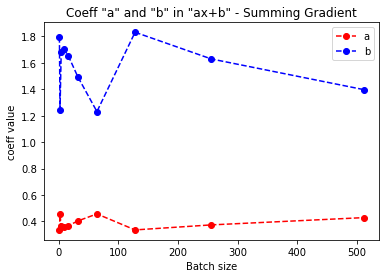

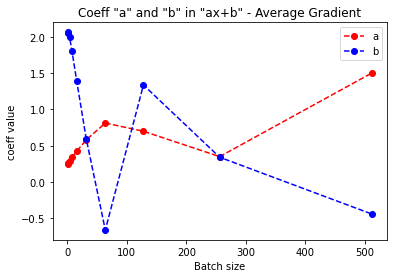

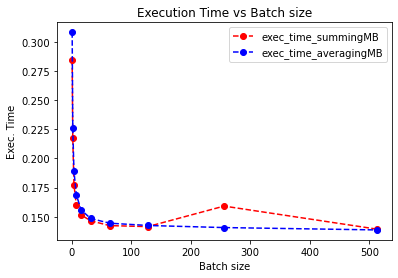

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

                            Result Summary:  Minibatch with Averaging Gradient (n_epoch = 1)                           

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The batch size of 4 lead to the best performance in terms of accuracy in Minibatch with Averaging Gradient approach 

The corresponding weights derived  are a = 0.291 and b = 1.996 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------* 

                            Result Summary:  Minibatch with Summing Gradient (n_epoch = 1)                           

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*
The batch size of 128 lea

In [43]:
# Collecting all weights as np array in order to check further which is closest to a=0.3 and b=2
weight_all_avg = np.array(weight_all_avg)
weight_all_sum = np.array(weight_all_sum)
batchsize_list_avg = np.array(batchsize_list_avg)
batchsize_list_sum = np.array(batchsize_list_sum)
 
# Plotting weights "a" and "b" against various batch size.

## For Minibatch with Summing Gradient 
plt.title('Coeff "a" and "b" in "ax+b" - Summing Gradient')
plt.xlabel('Batch size')
plt.ylabel('coeff value')
plt.plot( batchsize_list_sum[:], weight_all_sum[:,1,0],'--bo', label='a', c='red')
plt.plot( batchsize_list_sum[:], weight_all_sum[:,0,0],'--bo', label='b', c='blue')
plt.legend(loc="upper right")
plt.show()

## For Minibatch with Averaging Gradient 
plt.title('Coeff "a" and "b" in "ax+b" - Average Gradient')
plt.xlabel('Batch size')
plt.ylabel('coeff value')
plt.plot( batchsize_list_avg[:], weight_all_avg[:,1,0],'--bo', label='a', c='red')
plt.plot( batchsize_list_avg[:], weight_all_avg[:,0,0],'--bo', label='b', c='blue')
plt.legend(loc="upper right")
plt.show()


## For Minibatch with Averaging Gradient 
plt.title('Execution Time vs Batch size')
plt.xlabel('Batch size')
plt.ylabel('Exec. Time')
plt.plot( batchsize_list_sum[:], np.array(exec_time_list_sum),'--bo', label='exec_time_summingMB', c='red')
plt.plot( batchsize_list_avg[:], np.array(exec_time_list_avg),'--bo', label='exec_time_averagingMB', c='blue')
plt.legend(loc="upper right")
plt.show()


# Computing a and b closest to a=0.3 and b=2
a_sum = np.abs(weight_all_sum[:,1,0] - 0.3)
b_sum = np.abs(weight_all_sum[:,0,0] - 2)
a_avg = np.abs(weight_all_avg[:,1,0] - 0.3)
b_avg = np.abs(weight_all_avg[:,0,0] - 2)
min_bsum = np.amin(b_sum)
min_bavg = np.amin(b_avg)
best_avg = np.where(b_avg == min_bavg)
best_sum = np.where(b_sum == min_bsum)
best_avg = best_avg[0][0]
best_sum = best_sum[0][0]

print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("                            Result Summary:  Minibatch with Averaging Gradient (n_epoch = 1)                           \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")

print("The batch size of", 2**best_avg, "lead to the best performance in terms of accuracy in Minibatch with Averaging Gradient approach \n")
print("The corresponding weights derived  are a =", weight_all_avg[best_avg, 1,0], "and b =", weight_all_avg[best_avg, 0,0],"\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------* \n")
print("                            Result Summary:  Minibatch with Summing Gradient (n_epoch = 1)                           \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*")
print("The batch size of", 2**best_sum, "lead to the best performance in terms of accuracy in Minibatch with Summing Gradient approach \n")
print("The corresponding weights derived  are a =", weight_all_sum[best_sum, 1,0], "and b =", weight_all_sum[best_sum, 0,0],"\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------* \n")


print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------* \n")
print("                    As expected larger the batch size lower the execution time                                \n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*")



# Q 2 a) The probability that someone has both cold and a fever?

# Soln.
<font size="4">
    
The probability that someone has both cold and a fever implies finding out $p(Cold=T, Fever=T)$ <br>
    
$$p(Cold=T, Fever=T) = p(Fever=T | Cold=T) p(Cold=T)$$
    
$$p(Cold=T, Fever=T) = \frac{0.307}{0.307 + 0.693} * 0.002 $$
    
$$ p(Cold=T, Fever=T) = 0.000614$$

    
</font>

# Q 2 b) The probability that someone who has a cough has a cold?

# Soln.
<font size="4">
    
The probability that someone who has a cough has a cold implies finding out $p(Cold=T|Cough=T)$ <br>
    
$$p(Cold=T|Cough=T) = \frac{p(Cold=T,Cough=T)}{p(Cough=T)}$$
    
$$p(Cold=T|Cough=T) = \frac{p(Cough=T | Cold=T) * p(Cold=T)}{p(Cough=T)}$$

$$p(Cold=T|Cough=T) = \frac{\frac{p(Cough=T | Cold=T)}{p(Cough=T | Cold=T) + p(Cough=F | Cold=T)} * p(Cold=T)}{p(Cough=T)} \label{eq:Main} \tag{1}$$

where, we get $p(Cough=T)$ by marginalising over other variable Cold and Lung Disease (LD) <br>
    
<font size="3">
    
$$p(Cough=T) = \frac{p(Cough=T | Cold=(T,F),LD=(T,F))}{p(Cough=T | Cold=(T,F),LD=(T,F)) + p(Cough=F | Cold=(T,F),LD=(T,F))} \label{eq:Denom1} \tag{2}$$
    
</font>
    
Thus referring to the table given in Question 2 and replacing values in \eqref{eq:Denom1}, we get,
    
$$p(Cough=T) = \frac{(0.7525 + 0.505 + 0.505 + 0.01)}{(0.7525 + 0.505 + 0.505 + 0.01) + (0.2475 + 0.495 + 0.495 + 0.99)} \label{eq:Denom2} \tag{3}$$
    
$$ p(Cough=T) = 0.44312 \label{eq:Denom3} \tag{4}$$ 
    
Using \eqref{eq:Denom1} and  values of p(Cough=T | Cold=T), p(Cough=F | Cold=T) from table (given in Question 2) in \eqref{eq:Main}, We get

$$p(Cold=T|Cough=T) = \frac{\frac{(0.7525 + 0.505)}{(0.7525 + 0.505) + (0.2475 + 0.495)} * 0.02}{0.44312} $$
    
$$p(Cold=T|Cough=T) = \frac{0.01257}{0.44312}$$
    
$$p(Cold=T|Cough=T) = 0.028367$$

Hence, The probability that someone who has a cough has a cold is about 0.028.
</font>

# Q3) Derive the MLE for the parameters of a k-sided multinomial distribution. 

# Soln.
<font size="4">
Let us consider a case where the observations $(y_1, y_2, ..., y_n)$ follow a k sided Multinomial distribution. Let the parameters of the Multinomial distribution be $(\theta_1, \theta_2,..., \theta_k)$. We also assume that the number of observations belonging to $i^{th}$ class is $n_i$ which implies $\sum_{i=1}^k n_i = n$ The Likelihood of the observations $(y_1, y_2, ..., y_n)$ can be written as :

\begin{equation}
    Likelihood = p(y_1, y_2, ..., y_n | \theta_1, \theta_2,..., \theta_k) = \frac{n!}{n_1!\,n_2! ...\, n_k!} \prod_{i=1}^{k} \theta_i^{n_i} \\
            = \frac{n!}{n_1!\,n_2! ...\, n_k!} \theta_1^{n_1}    \theta_2^{n_2} ... \theta_k^{n_k}
    \label{eq:Likelihood} \tag{1}
\end{equation}

where, $\sum_{i=1}^k \theta_i = 1$ <br>
<br>
**Goal**: To estimate $\theta_1, \theta_2,..., \theta_k $using MLE approach.

**Derivation**: Consider the Likelihood in equation $\eqref{eq:Likelihood}$. Taking log of $\eqref{eq:Likelihood}$ we get,

\begin{equation}
    log(p(y_1, y_2, ..., y_n | \theta_1, \theta_2,..., \theta_k)) = log \left( \frac{n!}{n_1!\,n_2! ...\, n_k!} \right) + log \left(\theta_1^{n_1}    \theta_2^{n_2} ... \theta_k^{n_k} \right)\\
    \label{eq:Likelihood2} \tag{2}
\end{equation}

\begin{equation}
    log(p(y_1, y_2, ..., y_n | \theta_1, \theta_2,..., \theta_k)) = log \left( \frac{n!}{n_1!\,n_2! ...\, n_k!} \right) + \sum_{i=1}^{k} n_i log (\theta_i)
    \label{eq:Likelihood3} \tag{3}
\end{equation}

with an additional constraint of $\sum_{i=1}^k \theta_i = 1$ <br>

In order to maximize the log likelihood to estimate $\theta_1, \theta_2,..., \theta_k$ following optimization problem is framed using lagrange multiplier to account for the constraints:

\begin{equation}
    L(\theta_1, \theta_2,..., \theta_k, \lambda) = log \left( \frac{n!}{n_1!\,n_2! ...\, n_k!} \right) + \sum_{i=1}^{k} n_i log (\theta_i) + \lambda \left(1 - \sum_{i=1}^{k} \theta_i \right)
    \label{eq:Optimize} \tag{4}
\end{equation}

Now, to maximize $\eqref{eq:Optimize}$, we differentiate it with respect to $\theta_1, \theta_2,..., \theta_k, \lambda$. <br>
Differentiating w.r.t $\lambda$ yields:

\begin{equation}
    \sum_{i=1}^k \theta_i = 1 \label{eq:p} \tag{5}
\end{equation}

Differentiating w.r.t $\theta_i$ yields:

\begin{equation}
    \frac{\partial L}{\partial \theta_i } = 0
\end{equation}

\begin{equation}
    \Rightarrow \frac{n_i}{\theta_i} = \lambda \label{eq:n_i} \tag{6}\\
    \Rightarrow  n_i = \sum_{i=1}^{k} \lambda \theta_i  \\
    \Rightarrow \sum_{i=1}^{k} n_i = \lambda \sum_{i=1}^{k} \theta_i \\
    \Rightarrow \lambda = n  \\
\end{equation}

Thus we got, 
\begin{equation}
    \lambda = n  \label{eq:lambda} \tag{7} \\
\end{equation}


Using $\eqref{eq:n_i}$ and $\eqref{eq:lambda}$, we write:

\begin{equation}
    \theta_i = \frac{n_i}{n} 
\end{equation}

Hence, Maximum Likelihood Estimation for the parameters are

\begin{equation}
    \theta_1 = \frac{n_1}{n}\\
    \theta_2 = \frac{n_2}{n}\\
    .\\
    .\\
    .\\
    \theta_k = \frac{n_k}{n}\\
\end{equation}
    </font>